# Greedy Algorithms

Lab associated with Module 8: Greedy Algorithms

***

In [1]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

***

### Section 0: Imports

In [2]:
import numpy as np

In [3]:
import math

In [4]:
from IPython.display import Image
from graphviz import Digraph

***

### <font color='red'> Activity 1: Write code for creating a prefix tree for any arbitrary distribution, e.g., [A:45, B:13, C:12, D:16, E:9, F:5]. Your algorithm should return the prefix tree and should display the correct code for every alphabet.. </font>

In [5]:
#### TODO ####
### Good Luck ###

class Node:
    def __init__(self, symbol, probability, left=None, right=None):
        self.symbol = symbol
        self.probability = probability
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.probability < other.probability

#Creates the tree
def huffman_coding(symbols, probabilities):
    
    #Creates nodes for each letter along with its probability
    nodes = [Node(symbol, prob) for symbol, prob in zip(symbols, probabilities)]

    while len(nodes) > 1: #While there is more than one node left
        nodes.sort() #Sort the nodes by probability
        left, right = nodes.pop(0), nodes.pop(0) #Takes the two nodes with the smallest probabilities
        #Creates a parent by adding their probabilites
        parent = Node(None, left.probability + right.probability, left, right)
        nodes.append(parent) #Adds the parent to the list of nodes
        nodes.sort()

    codes = {} #Stores Huffman codes
    curr_node = nodes[0]  #Start from the root of the tree
    curr_code = "" #Holds the current node

    #Traverses the tree
    def traverse(node, code):
        if node is None: #If there are no nodes
            return
        if node.symbol is not None: #If we reach leaf node, store its code
            codes[node.symbol] = code
            return

        traverse(node.left, code + "0") #Append 0 to the code when going left
        traverse(node.right, code + "1") #Append 1 to the code when going right

        #Recursively calls this function
    traverse(curr_node, curr_code)
    return codes #Return codes

def main():
    symbols = ['A', 'B', 'C', 'D', 'E', 'F']
    probabilities = [45, 13, 12, 16, 9, 5]
    
    codes = huffman_coding(symbols, probabilities)

    sorted_codes = sorted(codes.items(), key=lambda x: (len(x[1]), x[1]))

    print("\nSymbol\t Codeword")
    print("------   --------")
    
    for symbol, code in sorted_codes:
        print(f" {symbol}\t    {code}")

if __name__ == "__main__":
    main()


Symbol	 Codeword
------   --------
 A	    0
 C	    100
 B	    101
 D	    111
 F	    1100
 E	    1101


***

###  Prim's Algorithm

Graph's Preliminaries

In [6]:
from graph import *

In [7]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf

        self.parent = None
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
    def __lt__(self, other):
        return self.value < other.value
        
        
    def __str__(self):
        
        return str(self.value) 


class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b[0]) + "," + str (b[1]) + ") "
        ret += "\n"
        return ret

In [8]:
G = Graph()

for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']:
    G.addVertex( Node(i) )

In [9]:
V = G.vertices

#0, 1, 2, 3, 4, 5, 6, 7, 8
#A, B, C, D, E, F, G, H, I

G.addBiEdge( V[0], V[1], 4)
G.addBiEdge( V[0], V[7] , 8)
G.addBiEdge( V[1], V[7], 11)
G.addBiEdge( V[1], V[2], 8)
G.addBiEdge( V[2], V[3], 7)
G.addBiEdge( V[3], V[4], 9)
G.addBiEdge( V[3], V[5], 14 )
G.addBiEdge( V[4], V[5], 10 )
G.addBiEdge( V[2], V[5], 4 )
G.addBiEdge( V[2], V[8], 2 )
G.addBiEdge( V[5], V[6], 2 )
G.addBiEdge( V[6], V[7], 1 )
G.addBiEdge( V[6], V[8], 6 )
G.addBiEdge( V[7], V[8], 7 )

dot = Digraph()
dot.edge('A', 'B', label='4')
dot.edge('A', 'H', label='8')
dot.edge('B', 'H', label='11')
dot.edge('B', 'C', label='8')
dot.edge('C', 'D', label='7')
dot.edge('D', 'E', label='9')
dot.edge('D', 'F', label='14')
dot.edge('E', 'F', label='10')
dot.edge('C', 'F', label='4')
dot.edge('C', 'I', label='2')
dot.edge('F', 'G', label='2')
dot.edge('G', 'H', label='1')
dot.edge('G', 'I', label='6')
dot.edge('H', 'I', label='7')


In [10]:
print(G)

Graph with:
	 Vertices:
	A,B,C,D,E,F,G,H,I,
	 Edges:
	(A,B,4) (A,H,8) (B,A,4) (B,H,11) (B,C,8) (C,B,8) (C,D,7) (C,F,4) (C,I,2) (D,C,7) (D,E,9) (D,F,14) (E,D,9) (E,F,10) (F,D,14) (F,E,10) (F,C,4) (F,G,2) (G,F,2) (G,H,1) (G,I,6) (H,A,8) (H,B,11) (H,G,1) (H,I,7) (I,C,2) (I,G,6) (I,H,7) 



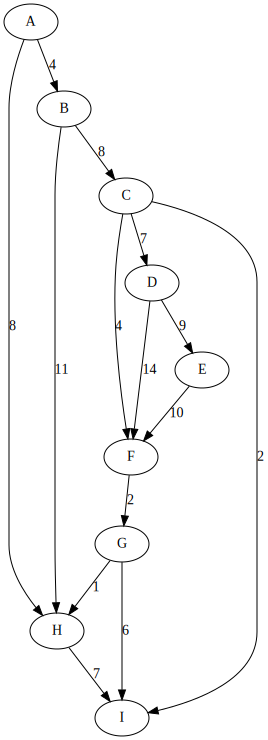

In [11]:
dot

This is what we had in the lectures as the slow implementation of Prim's Algorithm

In [12]:
# G is graph
# s is the node to start

def slowPrim(G, s):
    
    # first, find the lightest edge leaving the starting node
    bestWt = np.inf #Initialize the best weight as infinity
    bestu = None #Initialize the best neighbouring node as none
    
    #Loop through all the neighbours of s to find the smallest edge
    for u,wt in s.getOutNeighborsWithWeights():
        
        if wt < bestWt: #The edge is lighter than the current best
            bestWt = wt #Update the best weight
            bestu = u #Update the best neighbouring node
    
    MST = [ (s, bestu,bestWt) ] #Initialize the minimum spanning tree
    verticesVisited = [s,bestu] #Initialize a list of visited vertices
    
    #Loop until all the vertices have been visited 
    while len(verticesVisited) < len(G.vertices): # danger! this will loop forever if the graph isn't connected...
        
        # find the lightest edge (x,v) so that x has been visited and v hasn't.
        bestWt = np.inf #Initialize the best weight as infinity
        bestv = None #Initialize best unvisited node
        bestx = None #Initialize best visited node
        
        #Loop through all visited nodes
        for x in verticesVisited:
            #Loop through all its neighbours
            for v,wt in x.getOutNeighborsWithWeights():
                if v in verticesVisited: #If visited, skip
                    continue
                #If smaller than best
                if wt < bestWt:
                    bestWt = wt
                    bestv = v
                    bestx = x
                    
        MST.append((bestx,bestv,bestWt)) #Add selected edge to MST
        verticesVisited.append(bestv)
    
    return MST

In [13]:
T = slowPrim(G, G.vertices[0])
sum = 0
for x,y,wt in T:
    print(x,y)
    sum += wt

print(sum)

A B
A H
H G
G F
F C
C I
C D
D E
37


Okay, it seems to be working fine, but as we discussed, will be quite slow. Let us see if we can work on the faster version of the code as:

### <font color='red'> Activity 2: In lights of Prim's Algorithm above, write an efficient implementation based on our discussions in the Seminar/Lecture. </font>

In [14]:
import heapdict as heapdict

def prim(G,w):
    
    #Initialize all vertices estimated distance to infinity
    for v in G.vertices: 
        v.estD = np.inf
    
    w.estD = 0 #Starting node distance set to 0
    MST = [] #Inistialize minimum spanning tree list
    unvisitedVertices = heapdict.heapdict() #Tracks unvisited vertices
    
    for v in G.vertices: #Adds all the vertices to the unvisited heap
        unvisitedVertices[v] = v.estD
    
    #Loops through all the unvisited vertices
    while len(unvisitedVertices) > 0:
        
        #Finds the u with the minimum estD, using the heap
        u, dist = unvisitedVertices.popitem() 
        if u.estD == np.inf:
            return #The graph is disconnected
        
        #Adds u to the Minimum Spanning Tree
        if u.parent != None: #Skips the first vertex
            MST.append((u.parent,u,dist)) #Add the edge to the MST
        
        #Loops through the neighbours of u
        for v, wt in u.getOutNeighborsWithWeights():
            if v in unvisitedVertices: #Loops through unvisited neighbours
                if wt < v.estD:
                    v.estD = wt #If the weight from u to v is smaller than v's current weight, update it
                    unvisitedVertices[v] =  wt 
                    v.parent = u # v points to u now
                    
    return MST

In [15]:
T = prim(G, G.vertices[0])
cost  = 0
for x,y,wt in T:
    print(x,y)
    cost += wt

print(cost)

A B
B C
C I
C F
F G
G H
C D
D E
37


***